# Exploración de datos

### Liberías y carga de datos

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
# Carga de datos
df_customer = pd.read_csv('../datos/crudos/marketing_campaign.csv', sep='\t')
df_customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [119]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Outliers

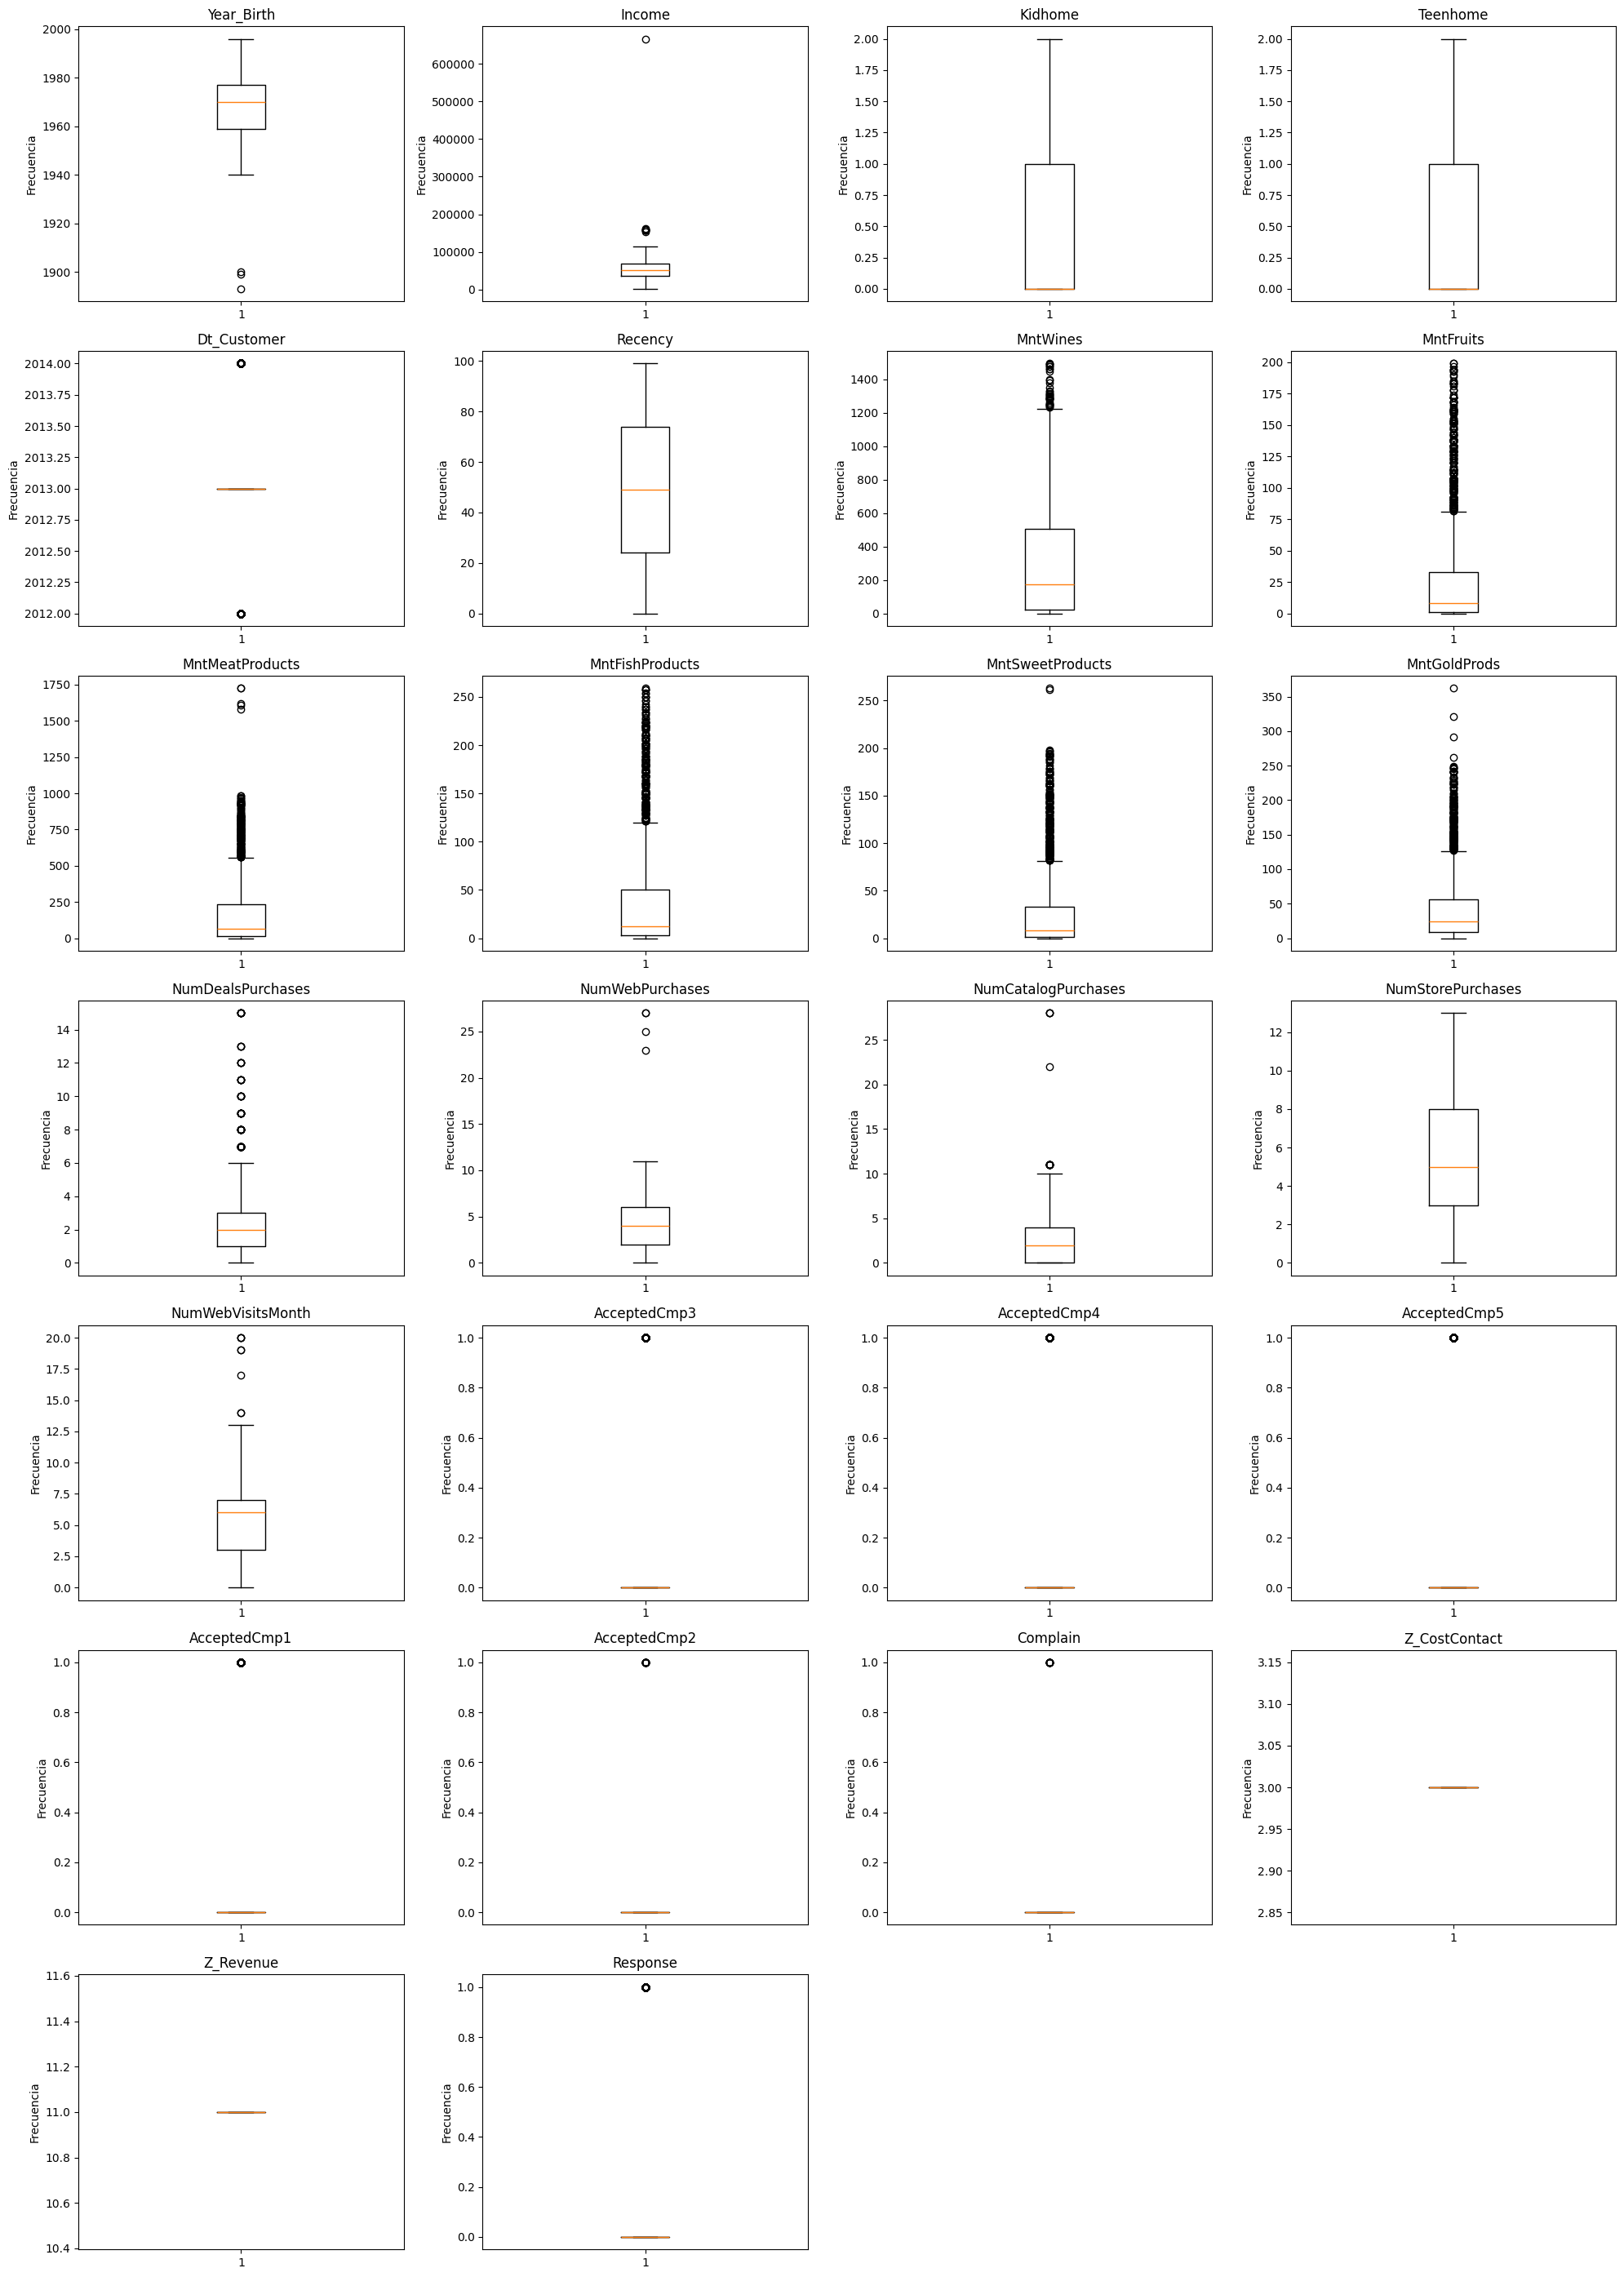

In [120]:
# Se elimina el ID
df_customer.drop(columns='ID', inplace=True)

# Se toma solo el año de la fecha
df_customer['Dt_Customer'] = df_customer['Dt_Customer'].str[-4:].astype('int64') 

# Seleccionamos solo las columnas numéricas
numericas = df_customer.select_dtypes(include='number')

# Definimos el número de columnas por fila
n_cols = 4
n_rows = -(-len(numericas.columns) // n_cols)  # División techo

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Dibujamos cada histograma
for i, col in enumerate(numericas.columns):
    axes[i].boxplot(df_customer[col].dropna())
    axes[i].set_title(col)
    axes[i].set_ylabel("Frecuencia")

# Ocultar subplots vacíos si hay menos gráficos que espacios
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


In [121]:
income = df_customer.sort_values(by='Income', ascending=False)
income.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,1977,Graduation,Together,666666.0,1,0,2013,23,9,14,...,6,0,0,0,0,0,0,3,11,0
617,1976,PhD,Together,162397.0,1,1,2013,31,85,1,...,1,0,0,0,0,0,0,3,11,0
687,1982,PhD,Married,160803.0,0,0,2012,21,55,16,...,0,0,0,0,0,0,0,3,11,0
1300,1971,Master,Together,157733.0,1,0,2013,37,39,1,...,1,0,0,0,0,0,0,3,11,0
164,1973,PhD,Married,157243.0,0,1,2014,98,20,2,...,0,0,0,0,0,0,0,3,11,0


In [122]:
df_customer.drop(index=2233, inplace=True)

In [123]:
year_birth = df_customer[df_customer.Year_Birth < 1930]
year_birth.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,1900,2n Cycle,Divorced,36640.0,1,0,2013,99,15,6,...,5,0,0,0,0,0,1,3,11,0
239,1893,2n Cycle,Single,60182.0,0,1,2014,23,8,0,...,4,0,0,0,0,0,0,3,11,0
339,1899,PhD,Together,83532.0,0,0,2013,36,755,144,...,1,0,0,1,0,0,0,3,11,0


In [124]:
df_customer = df_customer[df_customer.Year_Birth > 1930]

### Imputación nulos

In [125]:
# Conteo de nulos por feature
df_customer.isnull().sum().sort_values(ascending=False).head(10)

Income            24
Year_Birth         0
Education          0
Marital_Status     0
Kidhome            0
Teenhome           0
Dt_Customer        0
Recency            0
MntWines           0
MntFruits          0
dtype: int64

In [126]:
# Lista con las vairables que inicien con Mnt que corresponden al monto gastado
cols_a_sumar = [col for col in df_customer.columns if col.startswith('Mnt')]
# Agrego una columna con el total de los valores gastados
df_customer['Total_gasto'] = df_customer[cols_a_sumar].sum(axis=1)

In [128]:
df_customer.Total_gasto.describe()

count    2236.000000
mean      605.986583
std       601.865156
min         5.000000
25%        69.000000
50%       396.500000
75%      1045.500000
max      2525.000000
Name: Total_gasto, dtype: float64

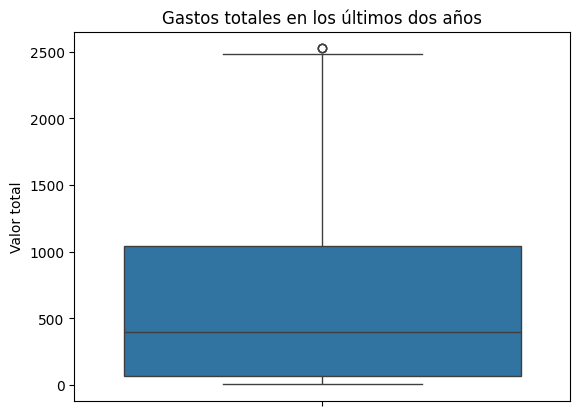

In [130]:
sns.boxplot(df_customer.Total_gasto)
plt.title('Gastos totales en los últimos dos años')
plt.ylabel('Valor total')
plt.show();

In [131]:
# Clasifica los gastos
def clasificar_valor(valor):
    if valor < 500:
        return "Menor a 500"
    elif valor < 1000:
        return "Entre 500 y 999"
    elif valor < 1500:
        return "Entre 1000 y 1499"
    elif valor < 2000:
        return "Entre 1500 y 2000"
    elif valor < 2500:
        return "Entre 2000 y 2500"
    else:
        return "Mayor a 2500"

In [132]:
# Clasificamos los gastos
df_customer['Clase_gasto'] = df_customer['Total_gasto'].apply(clasificar_valor)

In [133]:
# Imputamos Income con la media agrupada
df_customer['Income'] = df_customer['Income'].fillna(df_customer.groupby(['Clase_gasto', 'Year_Birth', 'Education'])['Income'].transform('mean'))

# Imputamos los demás Income con la media general
df_customer['Income'] = df_customer['Income'].fillna(df_customer['Income'].mean())

In [134]:
df_customer.drop(columns=['Clase_gasto'], inplace=True)

### Correlaciones

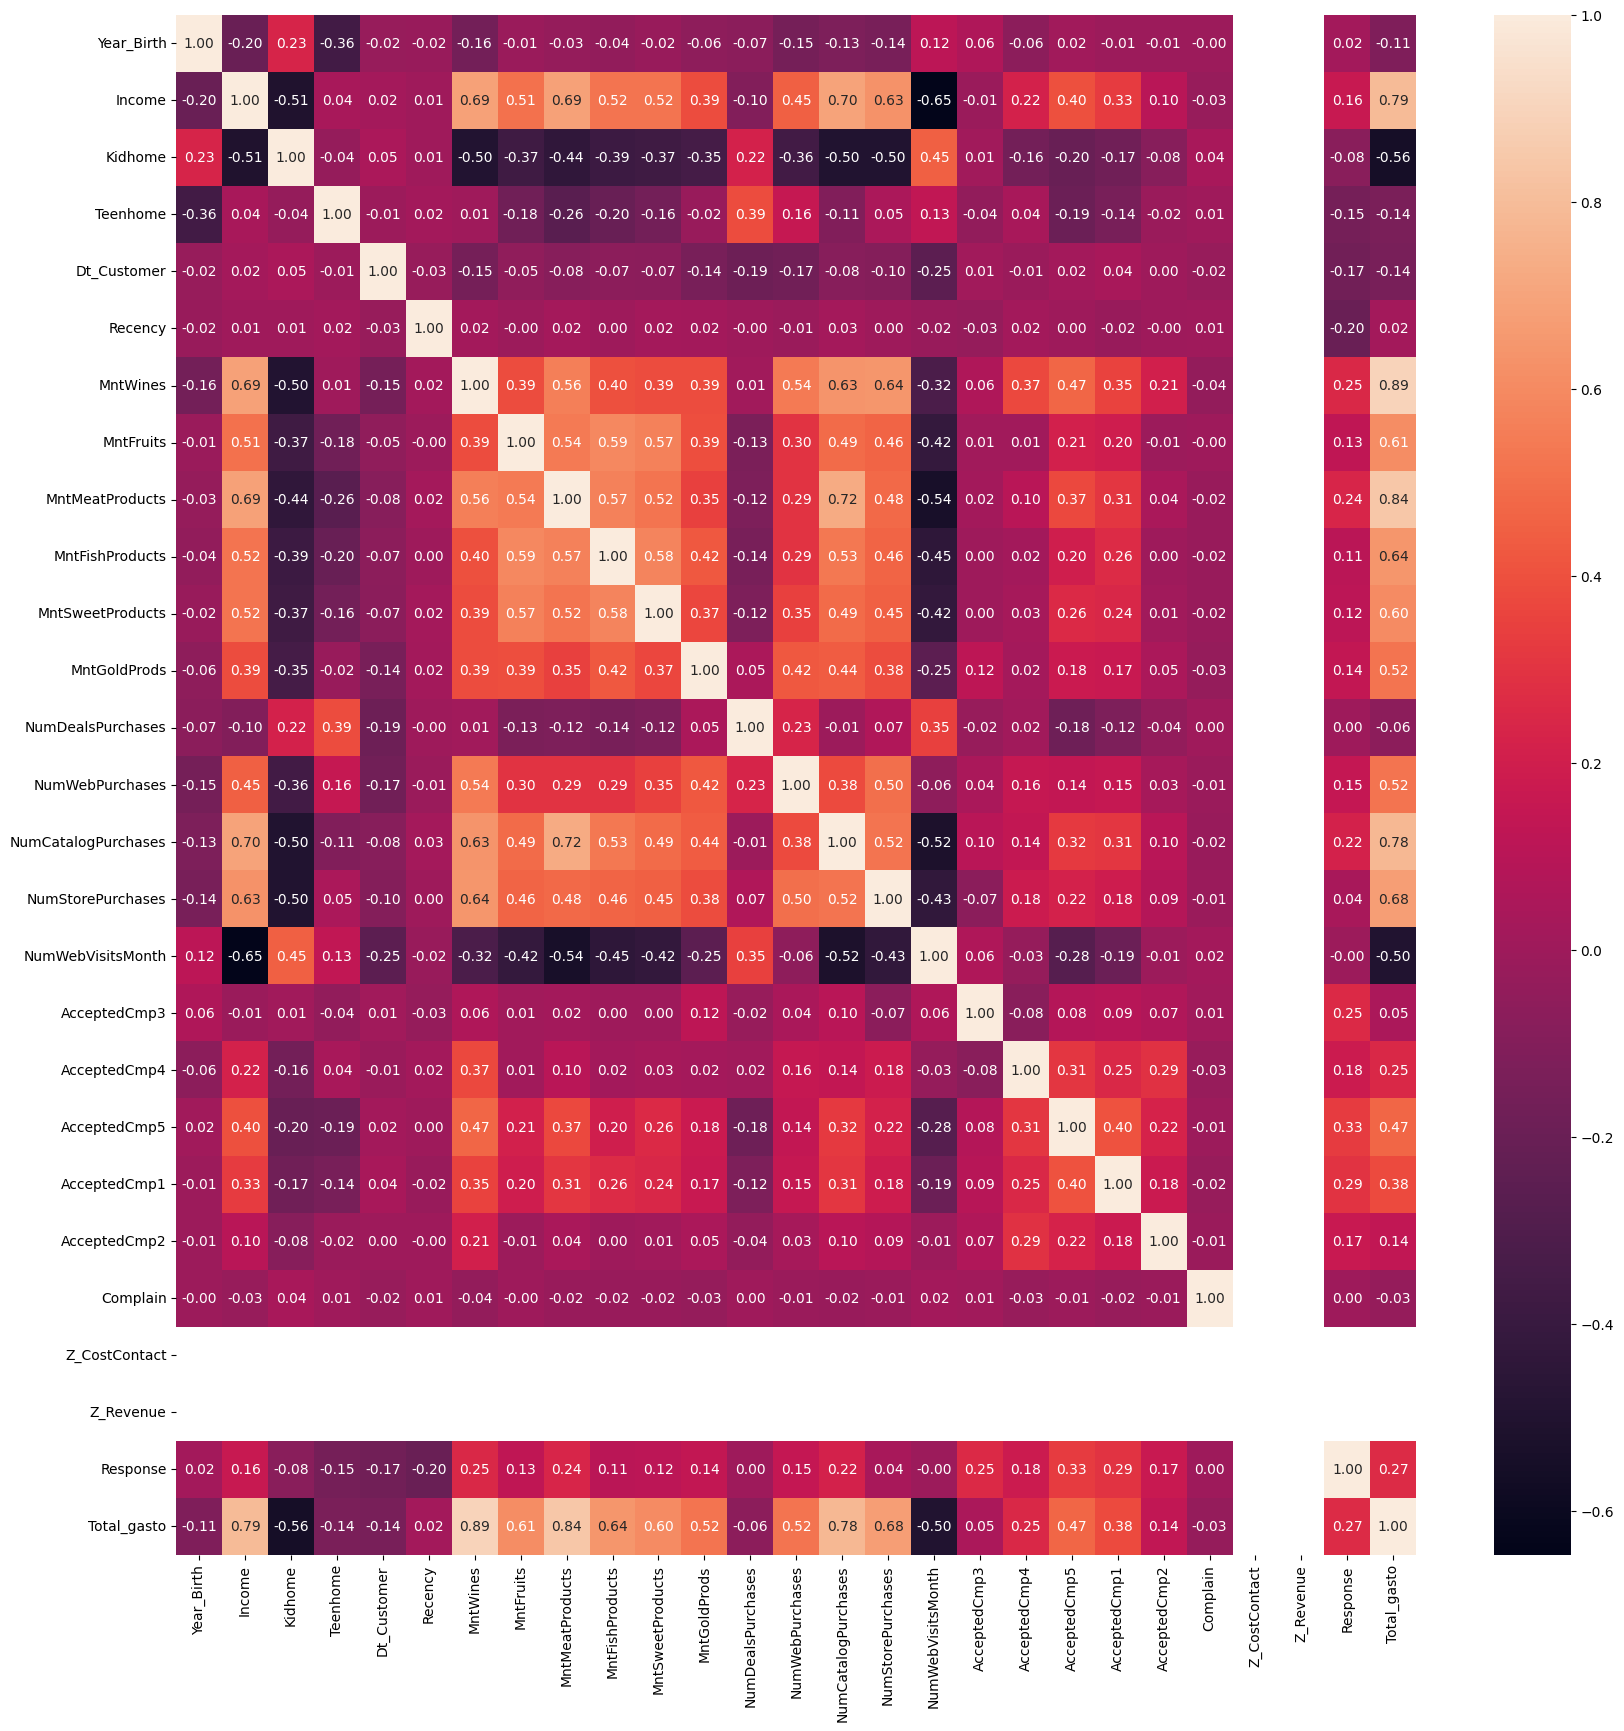

In [135]:
col_numericas = df_customer.select_dtypes(include='number').columns.to_list()
mc = df_customer[col_numericas].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(mc, annot=True, fmt='.2f')
plt.show();

In [136]:
print(f'Z_constContact: {df_customer.Z_CostContact.unique()}')
print(f'Z_Revenue: {df_customer.Z_Revenue.unique()}')

Z_constContact: [3]
Z_Revenue: [11]


In [137]:
df_customer.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

In [138]:
df_customer.to_csv('../datos/procesados/marketing_campaign_processed.csv', index=False)